Filtern

In [3]:
import numpy as np
import pandas as pd
import pickle


In [4]:
#url = 'C:/Users/oache/OneDrive - Hochschule München/Codeing/KI_ML/vehicles.csv/vehicles.csv'
url= 'C:/Users/nicof/OneDrive/Dokumente/FH-München/KI\Modularbeit/archive/vehicles.csv'
df = pd.read_csv(url)
  
  
df_s1 = df
df_s1 = df_s1.drop(['id','VIN','url','region_url','size','image_url','description','county','lat','long'],axis=1)
  

df_s1 = df_s1.dropna(subset=['manufacturer', 'price','model','year'])
df_s1.head(5)



,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,posting_date
27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,pickup,white,al,2021-05-04T12:31:18-0500
28,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,pickup,blue,al,2021-05-04T12:31:08-0500
29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,pickup,red,al,2021-05-04T12:31:25-0500
30,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,pickup,red,al,2021-05-04T10:41:31-0500
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al,2021-05-03T14:02:03-0500


df.column_1.apply(lambda x: x.split(' / ')[0])

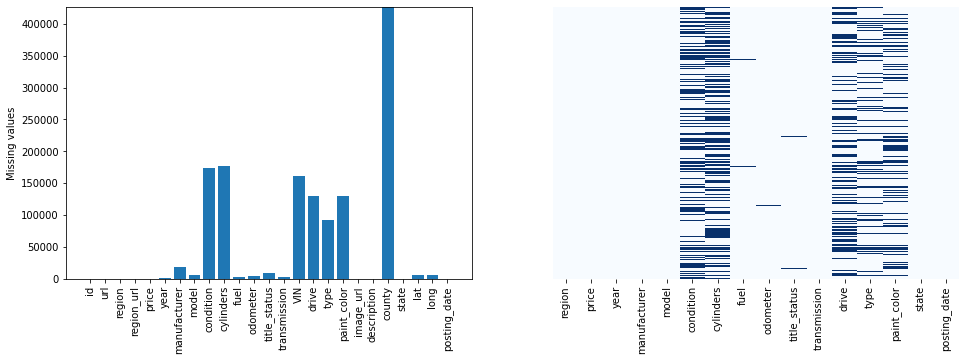

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

#Let's visualize the missing data
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,5))
#first plot, bar plot of missing values
ax1.bar(df.columns,df.isna().sum())
ax1.set_ylabel('Missing values')
ax1.set_ylim(0,df.shape[0])
ax1.tick_params('x',labelrotation=90)
#second plot, heatmap of missing values
sns.heatmap(df_s1.isna(),yticklabels=False,cbar=False, cmap='Blues',ax=ax2)
plt.show()




In [19]:
# Lösche Zeilen ohne Jahr, Modell oder Kilometerstand
df.dropna(subset=['year','model','fuel','odometer'],axis=0,inplace=True)
df.shape
#Lösche Zeilen mit mehr als 9 fehlenden Einträgen
df_s1.dropna(subset=['year','manufacturer','model', 'condition', 'cylinders', 'fuel','odometer','title_status','transmission', 
                    'drive', 'type', 'paint_color', 'state', 'posting_date'], axis=0, thresh=9, inplace=True)
df_s1.shape


(403289, 16)

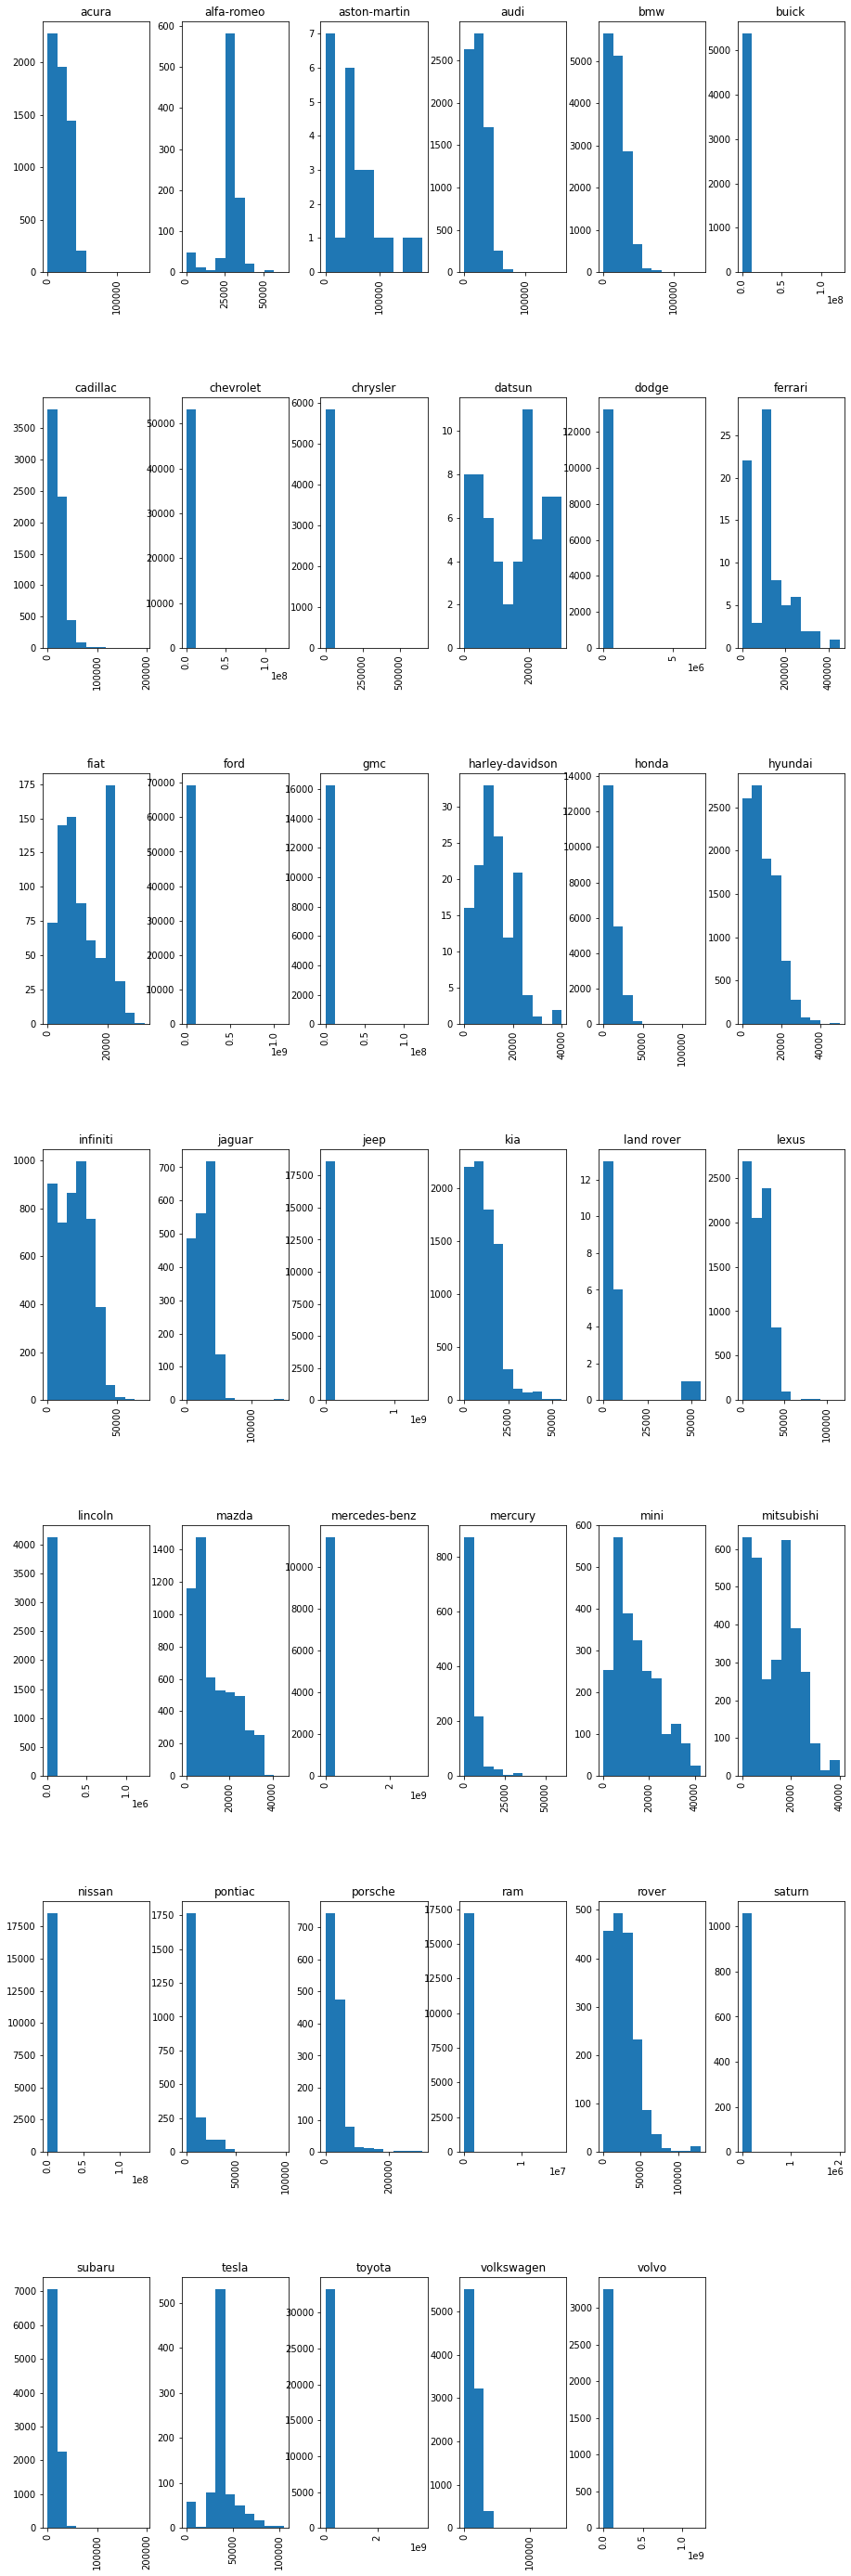

In [76]:
fig,ax=plt.subplots(1,1,figsize=(15,50))
df.hist('price','manufacturer',ax=ax,grid=1)
plt.grid(True)
plt.xticks(rotation=90)
plt.show()